## Importing all the relevant libraries in the next cell for the questions that follow

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem 3

    Housing
        Step 1. Import the necessary libraries
        Step 2. Create 3 differents Series, each of length 100, as follows:
            • The first a random number from 1 to 4
            • The second a random number from 1 to 3
            • The third a random number from 10,000 to 30,000
        Step 3. Create a DataFrame by joinning the Series by column
        Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
        Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
        to 'bigcolumn'
        Step 6. Ops it seems it is going only until index 99. Is it true?
        Step 7. Reindex the DataFrame so it goes from 0 to 299

In [2]:
# Creating the series
df1 = pd.Series(np.random.randint(1,5, 100))
df2 = pd.Series(np.random.randint(1,4, 100))
df3 = pd.Series(np.random.randint(10000,30001, 100))

In [3]:
# Merging the series into one
merged_df = pd.concat([df1,df2,df3], axis = 1)
merged_df

,0,1,2
0,3,1,22906
1,3,3,27507
2,3,2,23492
3,2,1,13373
4,1,1,17719
...,...,...,...
95,2,2,25540
96,4,2,11441
97,3,2,16737
98,2,2,24483


In [4]:
# Naming the columns
merged_df.columns = ["bedrs", "bathrs", "price_sqr_meter"]
merged_df

,bedrs,bathrs,price_sqr_meter
0,3,1,22906
1,3,3,27507
2,3,2,23492
3,2,1,13373
4,1,1,17719
...,...,...,...
95,2,2,25540
96,4,2,11441
97,3,2,16737
98,2,2,24483


In [5]:
# Coming all 3 series into one column
df_oneColumn = merged_df["bedrs"].append(merged_df["bathrs"].append(merged_df["price_sqr_meter"]))
df_oneColumn.columns = ["bigcolumn"]

In [6]:
df_oneColumn.tail()

95    25540
96    11441
97    16737
98    24483
99    11741
dtype: int32

In [7]:
# Resetting column index
df_oneColumn.reset_index()

,index,0
0,0,3
1,1,3
2,2,3
3,3,2
4,4,1
...,...,...
295,95,25540
296,96,11441
297,97,16737
298,98,24483


## Question 4
    Wind Statistics
    The data have been modified to contain some missing values, identified by NaN.
    Using pandas should make this exercise easier, in particular for the bonus question.
    You should be able to perform all of these operations without using a for loop or
    other looping construct.
    The data in 'wind.data' has the following format:
    Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL
    MAL
    61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
    61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
    61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
    The first three columns are year, month, and day. The remaining 12 columns are
    average windspeeds in knots at 12 locations in Ireland on that day.
        Step 1. Import the necessary libraries
        Step 2. Import the dataset from: "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data"
        Step 3. Assign it to a variable called data and replace the first 3 columns by a proper
        datetime index.
        Step 4. Year 2061? Do we really have data from this year? Create a function to fix it
        and apply it.
        Step 5. Set the right dates as the index. Pay attention at the data type, it should be
        datetime64[ns].
        Step 6. Compute how many values are missing for each location over the entire
        record.They should be ignored in all calculations below.
        Step 7. Compute how many non-missing values there are in total.
        Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and
        all the times.
        A single number for the entire dataset.
        Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
        windspeeds and standard deviations of the windspeeds at each location over all the
        days
        A different set of numbers for each location.
        Step 10. Create a DataFrame called day_stats and calculate the min, max and mean
        windspeed and standard deviations of the windspeeds across all the locations at each
        day.
        A different set of numbers for each day.
        Step 11. Find the average windspeed in January for each location.
        Treat January 1961 and January 1962 both as January.
        Step 12. Downsample the record to a yearly frequency for each location.
        Step 13. Downsample the record to a monthly frequency for each location.
        Step 14. Downsample the record to a weekly frequency for each location.
        Step 15. Calculate the min, max and mean windspeeds and standard deviations of the
        windspeeds across all locations for each week (assume that the first week starts on
        January 2 1961) for the first 52 weeks.

In [8]:
# Creating dataframe from the provided source
wind_Data = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data", delim_whitespace=True)
wind_Data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [9]:
# Defining a datetime convereter function
def date_time_converter(val):
    if val < 10:
        return(str(0)+str(val))
    else:
        return(str(val))

# Creating the Date column whihc will be used futher
wind_Data["Date"] = wind_Data[["Yr", "Mo", "Dy"]].apply(lambda l: "19" + str(l["Yr"])+"-"+date_time_converter(l["Mo"])+"-"+date_time_converter(l["Dy"]), axis=1 )
wind_Data["Date"] = pd.to_datetime(wind_Data["Date"])
wind_Data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05


In [10]:
# Dropping the redundant columns
wind_Data.drop(["Yr", "Mo", "Dy"], axis=1, inplace=True)


In [11]:
# Indexing Date column
wind_Data.set_index("Date", inplace=True)
wind_Data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [12]:
# Sum of missing values
wind_Data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [13]:
# Sum of non missing values
wind_Data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [14]:
# Finding the mean of the data
wind_Data.mean(axis=1).mean(axis=0)

10.228284167350386

In [15]:
# Creating the loc_stats table
loc_stats = pd.DataFrame()
loc_stats['min WS'] = wind_Data.min(axis=0)
loc_stats['max WS'] = wind_Data.max(axis=0)
loc_stats['mean WS'] = wind_Data.mean(axis=0)
loc_stats['Std. Dev WS'] = wind_Data.std(axis=0)

loc_stats.head()

,min WS,max WS,mean WS,Std. Dev WS
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125


In [16]:
# Creating the days_stats table
day_stats = pd.DataFrame()
day_stats['min WS'] = wind_Data.min(axis=1)
day_stats['max WS'] = wind_Data.max(axis=1)
day_stats['mean WS'] = wind_Data.mean(axis=1)
day_stats['Std. Dev WS'] = wind_Data.std(axis=1)

day_stats.head()

,min WS,max WS,mean WS,Std. Dev WS
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


In [17]:
# Finding the Data of January
wind_Data = wind_Data.reset_index() 
JanData = wind_Data[wind_Data['Date'].dt.month == 1]
JanData = JanData.mean(axis = 0)

JanData

C:\Users\diku1\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  after removing the cwd from sys.path.


RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [18]:
# Finding the Yearly data
data_Yearly = wind_Data.groupby(wind_Data['Date'].dt.year).sum()

data_Yearly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961,4427.85,3747.35,4124.54,2511.92,3950.08,2821.35,3523.68,3215.74,3130.45,3580.15,4928.52,4952.44
1962,4457.88,3690.31,4282.44,2533.60,3890.14,2698.47,4022.56,3209.72,3035.64,3531.83,4719.70,5213.92
1963,4676.91,3955.50,4577.52,2675.47,4279.30,3078.67,4042.63,3772.84,3249.81,3731.92,4978.19,5474.64
1964,4525.10,3996.78,4430.20,2484.33,4192.34,2770.94,3754.85,3465.05,2850.78,3736.11,5029.04,5457.17
1965,4544.75,4042.57,4324.80,2503.34,4024.05,2729.51,3875.83,3241.17,2886.21,3620.10,4731.95,5690.95
1966,4913.62,4218.38,4387.53,2681.19,4308.84,2844.69,3861.63,3224.81,3107.77,3565.67,5207.03,5952.15
1967,4649.06,4011.71,4284.88,2607.35,4245.22,2689.38,3887.99,3403.85,3155.43,3484.81,5392.71,6254.62
1968,4331.84,3831.36,4175.97,2370.83,3938.44,2220.64,3242.46,3021.52,2644.33,2866.87,4687.96,5496.40
1969,4075.72,3549.15,3979.23,2105.31,3603.98,2259.34,3126.04,2814.66,2892.45,2830.35,4606.75,5753.46


In [19]:
# Finding the Monthly Data
data_Monthly = wind_Data.groupby([wind_Data['Date'].dt.year.rename('Year'),wind_Data['Date'].dt.month.rename('Month')]).sum()

data_Monthly

RPT     VAL     ROS     KIL     SHA     BIR     DUB     CLA  \
Year Month                                                                   
1961 1      445.24  359.65  416.38  239.84  321.11  266.23  346.73  277.36   
     2      455.54  419.31  389.92  249.23  387.86  306.25  332.94  331.69   
     3      326.70  350.19  333.34  218.52  325.79  274.87  298.97  304.72   
     4      321.68  282.83  299.94  174.92  253.05  194.85  207.76  212.84   
     5      305.69  265.50  335.36  177.16  294.20  203.82  228.12  253.49   
...            ...     ...     ...     ...     ...     ...     ...     ...   
1978 8      299.00  256.04  280.00  139.59  228.41  183.99  175.16  167.95   
     9      327.41  326.85  319.05  171.75  311.16  278.35  323.71  287.49   
     10     306.83  268.80  288.17  146.36  264.28  210.00  251.58  227.47   
     11     484.55  444.08  405.24  219.52  344.25  262.29  344.77  289.72   
     12     501.44  426.19  484.69  219.94  353.36  286.49  374.40  316.04   

               MUL     CLO     BEL     MAL  
Year Month                                  
1961 1      281.66  313.33  430.31  455.80  
     2      331.00  356.00  520.33  431.53  
     3      298.53  348.81  508.74  471.60  
     4      220.27  217.11  334.42  308.35  
     5      249.22  263.48  368.91  372.36  
...            ...     ...     ...     ...  
1978 8      224.48  171.64  324.47  373.68  
     9      302.08  268.17  470.41  581.74  
     10     257.23  255.56  427.08  531.65  
     11     321.04  320.28  522.14  621.69  
     12     329.12  341.89  429.65  662.52  

[216 rows x 12 columns]

In [20]:
# Finding the Weekly data
data_Weekly = wind_Data.groupby([wind_Data['Date'].dt.year.rename('Year'),wind_Data['Date'].dt.month.rename('Month'), wind_Data['Date'].dt.week.rename('Week')]).sum()

data_Weekly

C:\Users\diku1\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


RPT     VAL     ROS    KIL     SHA     BIR     DUB  \
Year Month Week                                                          
1961 1     1      94.79   68.92   73.41  44.92   66.32   45.05   77.43   
           2      87.28   62.77   83.71  32.41   51.46   35.51   52.75   
           3      92.43   69.04   90.88  44.30   53.80   51.92   64.80   
           4     119.28  112.99  127.58  89.04  122.03  103.80  108.70   
           5      36.42   30.97   27.63  19.88   27.50   20.08   29.38   
...                 ...     ...     ...    ...     ...     ...     ...   
1978 12    48     56.20   50.34   56.08  29.50   44.17   41.79   51.33   
           49    145.18  134.33  119.24  68.44  107.01   89.42  101.06   
           50    117.31  102.85  104.91  48.42   79.78   50.91   71.46   
           51     78.09   56.06   92.21  28.03   54.78   44.03   54.59   
           52    104.66   82.61  112.25  45.55   67.62   60.34   95.96   

                    CLA     MUL     CLO     BEL     MAL  
Year Month Week                                          
1961 1     1      39.70   59.04   59.48   87.37   92.67  
           2      47.74   39.99   53.00   77.88   77.17  
           3      55.13   50.02   56.87   68.75   80.04  
           4     106.12  101.36  109.48  146.51  157.71  
           5      18.42   20.42   21.92   31.30   33.17  
...                 ...     ...     ...     ...     ...  
1978 12    48     38.84   41.71   46.54   48.76   71.40  
           49     87.42   97.09   98.58  129.62  161.43  
           50     55.77   64.18   59.96   77.72  108.94  
           51     60.67   50.06   56.51   82.92  132.84  
           52     73.34   76.08   80.30   90.63  187.91  

[1124 rows x 12 columns]

In [21]:
# Defining the seperate columns required
base_df = wind_Data.groupby([wind_Data['Date'].dt.year.rename('Year'),wind_Data['Date'].dt.week.rename('Week')]).sum()

mean_df = pd.Series(base_df.head(52).mean(axis=1))
min_df = pd.Series(base_df.head(52).min(axis=1))
max_df = pd.Series(base_df.head(52).max(axis=1))
stdev_df = pd.Series(base_df.head(52).std(axis=1))

C:\Users\diku1\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [22]:
# Defining the calculated dataframe with the required values
calculated_Data = pd.DataFrame({'Min WS':min_df, 'Max WS':max_df, 'Mean WS':mean_df, 'Std. Dev. WS':stdev_df})
calculated_Data

Min WS  Max WS     Mean WS  Std. Dev. WS
Year Week                                          
1961 1      39.70   94.79   67.425000     18.665854
     2      32.41   87.28   58.472500     19.037546
     3      44.30   92.43   64.831667     15.929948
     4      89.04  157.71  117.050000     19.379127
     5      57.73  117.79   82.602500     19.651171
     6      75.42  152.83  111.240833     22.031887
     7      60.50  148.17   95.247500     22.975869
     8      59.67  114.13   88.230000     16.550263
     9      54.84  124.90   79.417500     18.261704
     10     48.17  116.91   73.506667     19.789498
     11     49.59  135.45   82.294167     23.242226
     12     46.54  126.94   73.240000     21.503822
     13     43.80   97.30   70.397500     14.528849
     14     41.71   95.25   65.886667     16.798883
     15     34.63   66.38   47.919167     12.626817
     16     54.38   95.34   71.026667     13.271604
     17     33.61   70.82   52.115000     13.048908
     18     69.67  122.84   92.148333     15.562041
     19     37.07   72.95   55.750833     10.714129
     20     29.81   84.30   51.822500     16.773771
     21     22.49   81.88   49.933333     17.113453
     22     44.17   95.18   64.712500     15.169920
     23     36.50   85.75   59.213333     14.958301
     24     45.64  107.46   71.216667     18.737534
     25     38.35  121.87   70.465833     24.459895
     26     45.55  101.75   64.837500     15.215322
     27     50.54  111.91   73.070000     17.310881
     28     58.89  116.76   81.663333     17.387127
     29     19.01   58.91   37.456667     12.083577
     30     40.09   96.33   66.017500     15.953680
     31     43.67   96.32   66.127500     14.698140
     32     35.55   76.54   55.953333     12.862969
     33     60.20  109.25   87.293333     15.405967
     34     49.76  115.40   84.432500     18.544842
     35     39.50   95.65   59.061667     16.105509
     36     39.80   77.24   57.307500     13.063209
     37     73.10  139.15  101.575833     21.412518
     38     29.11   77.13   49.091667     14.411473
     39     58.59  113.46   81.450833     19.681967
     40     36.84   79.87   56.239167     15.042864
     41     46.05  106.82   67.890000     18.637243
     42     75.05  165.49  108.357500     24.567914
     43     56.61  128.83   88.034167     23.011550
     44     52.79  134.37   81.290000     22.777712
     45     29.54   76.01   52.410833     17.614695
     46     31.51  118.92   53.529167     24.744003
     47     34.79   89.13   60.280000     16.131285
     48     43.72  103.08   68.283333     19.070403
     49     60.37  121.54   92.017500     20.334799
     50     60.88  105.79   88.921667     14.774988
     51     38.62  110.30   65.210000     22.223507
     52     47.48  123.80   78.870000     25.444300

## Question 5
    Step 1. Import the necessary libraries
    Step 2. Import the dataset from: "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
    Step 3. Assign it to a variable called chipo.
    Step 4. See the first 10 entries
    Step 5. What is the number of observations in the dataset?
    Step 6. What is the number of columns in the dataset?
    Step 7. Print the name of all the columns.
    Step 8. How is the dataset indexed?
    Step 9. Which was the most-ordered item?
    Step 10. For the most-ordered item, how many items were ordered?
    Step 11. What was the most ordered item in the choice_description column?
    Step 12. How many items were orderd in total?
    Step 13.
    • Turn the item price into a float
    • Check the item price type
    • Create a lambda function and change the type of item price
    • Check the item price type
    Step 14. How much was the revenue for the period in the dataset?
    Step 15. How many orders were made in the period?
    Step 16. What is the average revenue amount per order?
    Step 17. How many different items are sold?

In [23]:
# Reading data from the website and inputing in Dataframe
chipotle_Data = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", delimiter="\t")

chipotle_Data.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [24]:
# Printing the total number of rows and columns
print("Total number of Rows X Coloumns of the dataset is:",chipotle_Data.shape)

Total number of Rows X Coloumns of the dataset is: (4622, 5)


In [25]:
# Lisitng out the columns
chipotle_Data.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [26]:
# Displaying the index of the dataset
chipotle_Data.index

RangeIndex(start=0, stop=4622, step=1)

In [27]:
# Displaying the most ordered item and its quantity
print("Most ordered Item:", chipotle_Data["item_name"].value_counts().reset_index().loc[0, "index"])
print("Total number of orders:", chipotle_Data["item_name"].value_counts().reset_index().loc[0, "item_name"])

Most ordered Item: Chicken Bowl
Total number of orders: 726


In [28]:
# Displaying the most ordered item in choice description
print("Most ordered item in choice_description:", chipotle_Data["choice_description"].value_counts().reset_index().loc[0, "index"])

Most ordered item in choice_description: [Diet Coke]


In [29]:
# Displaying the total number of items ordered
print("Total number of items ordered:", chipotle_Data.quantity.sum())

Total number of items ordered: 4972


In [30]:
# Converting datatype of price
chipotle_Data["item_price"] = chipotle_Data["item_price"].apply(lambda x: float(x[1:]))

In [31]:
chipotle_Data["item_price"].dtypes

dtype('float64')

In [32]:
# Displaying the total revenue
print("Total Revenue: ", (chipotle_Data["quantity"] * chipotle_Data["item_price"]).sum())

Total Revenue:  39237.02


In [33]:
# Displaying the total number of unique items ordered
print("Total Orders: ", len(chipotle_Data["order_id"].unique()))

Total Orders:  1834


In [34]:
# Displaying the revenue of each order
chipotle_Data["revenue"] = chipotle_Data["quantity"] * chipotle_Data["item_price"]

In [35]:
chipotle_Data.groupby("order_id")["revenue"].mean()

order_id
1        2.890000
2       33.960000
3        6.335000
4       10.500000
5        6.850000
          ...    
1830    11.500000
1831     4.300000
1832     6.600000
1833    11.750000
1834     9.583333
Name: revenue, Length: 1834, dtype: float64

In [36]:
# Displaying the Unique items
print("Total unique items: ", len(chipotle_Data["item_name"].unique()))

Total unique items:  50


## Note:
    All the csv files for the upcoming problems have been downlaoded and placed in the same folder as the notebook file, thus there will not be a full path line while reading the data from csv files.

## Question 6
    Create a line plot showing the number of marriages and divorces per capita in the
    U.S. between 1867 and 2014. Label both lines and show the legend.
    Don't forget to label your axes!

In [37]:
# Defining the dataset
df = pd.read_csv("us-marriages-divorces-1867-2014.csv")

df.head(10)

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
5,1872,378000.0,12000.0,42066000,9.0,0.3
6,1873,386000.0,13000.0,43225000,8.9,0.3
7,1874,385000.0,14000.0,44429000,8.7,0.3
8,1875,409000.0,14000.0,45492000,9.0,0.3
9,1876,405000.0,15000.0,46459000,8.7,0.3


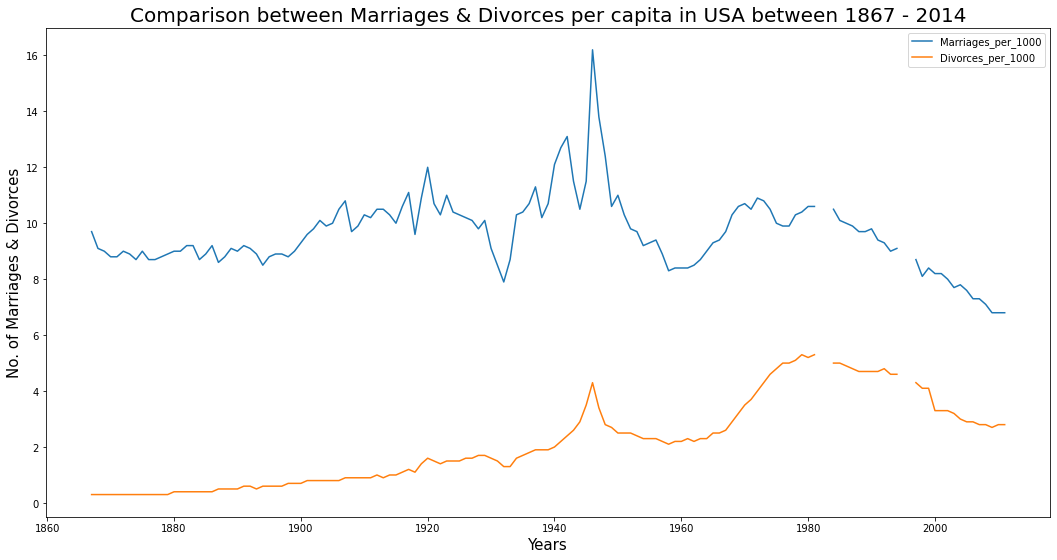

In [38]:
# Plotting the grpah
df.plot.line(x="Year", y=["Marriages_per_1000", "Divorces_per_1000"], figsize=(18,9)) 
plt.xlabel('Years', fontsize = 15) 
plt.ylabel('No. of Marriages & Divorces', fontsize = 15) 
plt.title("Comparison between Marriages & Divorces per capita in USA between 1867 - 2014", fontsize=20) 
plt.legend()
plt.show()

## Question 7
    Create a vertical bar chart comparing the number of marriages and divorces per
    capita in the U.S. between 1900, 1950, and 2000.
    Don't forget to label your axes!

In [39]:
# Reducing the previous Dataset
reduced_marriage_df =  df[(df.Year == 1900) | (df.Year == 1950) | (df.Year == 2000)]

In [40]:
reduced_marriage_df

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
33,1900,709000.0,56000.0,76094000,9.3,0.7
83,1950,1667000.0,385000.0,151684000,11.0,2.5
133,2000,2315000.0,944000.0,282398000,8.2,3.3


In [41]:
reduced_marriage_df = reduced_marriage_df.drop(columns = ['Marriages', 'Divorces', 'Population'])

In [42]:
# Indexing by year
reduced_marriage_df = reduced_marriage_df.set_index('Year')
reduced_marriage_df

,Marriages_per_1000,Divorces_per_1000
Year,,
1900,9.3,0.7
1950,11.0,2.5
2000,8.2,3.3


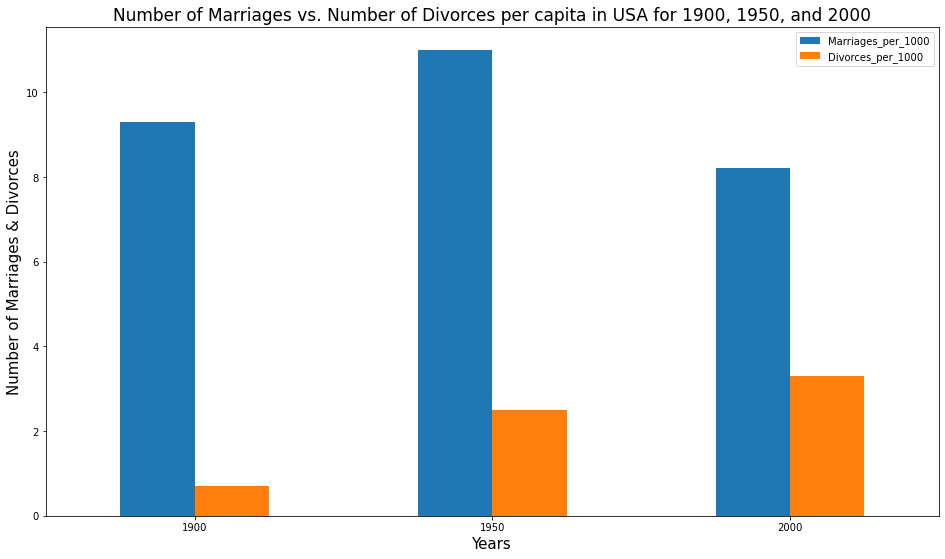

In [43]:
# Plotting the data
reduced_marriage_df.plot.bar(figsize=(16,9)) 
plt.xlabel('Years', fontsize = 15) 
plt.xticks(rotation = 0)
plt.ylabel('Number of Marriages & Divorces', fontsize = 15) 
plt.title("Number of Marriages vs. Number of Divorces per capita in USA for 1900, 1950, and 2000", fontsize=17) 
plt.legend() 
plt.show() 

## Question 8
    Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
    the actors by their kill count and label each bar with the corresponding actor's name.
    Don't forget to label your axes!

In [44]:
# Defining the dataset
actor_df = pd.read_csv("actor_kill_counts.csv")

actor_df

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239
5,Jet Li,201
6,Nicolas Cage,204
7,Sylvester Stallone,267
8,Tomisaburo Wakayama,226
9,Wesley Snipes,193


In [45]:
# Arranging the dataset by count
actor_df = actor_df.sort_values(by = "Count")

In [46]:
actor_df

,Actor,Count
9,Wesley Snipes,193
3,Clive Owen,194
5,Jet Li,201
6,Nicolas Cage,204
2,Clint Eastwood,207
8,Tomisaburo Wakayama,226
4,Dolph Lundgren,239
7,Sylvester Stallone,267
1,Chow Yun-Fat,295
0,Arnold Schwarzenegger,369


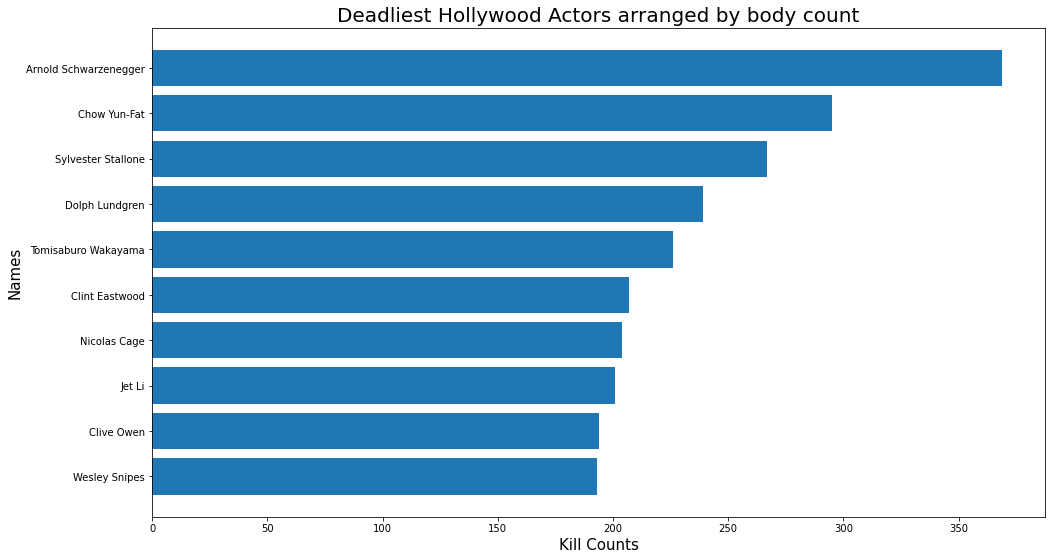

In [47]:
# Plotting the Data
plt.figure(figsize=(16,9)) 
plt.barh(actor_df['Actor'], actor_df['Count'])
plt.xlabel('Kill Counts', fontsize = 15) 
plt.ylabel('Names', fontsize = 15) 
plt.title("Deadliest Hollywood Actors arranged by body count", fontsize=20) 
plt.show()

## Question 9
    Create a pie chart showing the fraction of all Roman Emperors that were
    assassinated.
    Make sure that the pie chart is an even circle, labels the categories, and shows the
    percentage breakdown of the categories.

In [48]:
# Defining the dataset
roman_data = pd.read_csv("roman-emperor-reigns.csv")

roman_data

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


In [49]:
# Converting the dataset
assasinated_data = roman_data[roman_data.Cause_of_Death == "Assassinated"]

assasinated_data

,Emperor,Length_of_Reign,Cause_of_Death
2,Caligula,4.83,Assassinated
5,Galba,0.58,Assassinated
7,Vitellius,0.67,Assassinated
10,Domitian,15.00,Assassinated
17,Commodus,15.00,Assassinated
18,Pertinax,0.25,Assassinated
21,Caracalla,19.00,Assassinated
22,Geta,3.00,Assassinated
24,Elagabalus,3.75,Assassinated
25,Severus Alexander,13.00,Assassinated


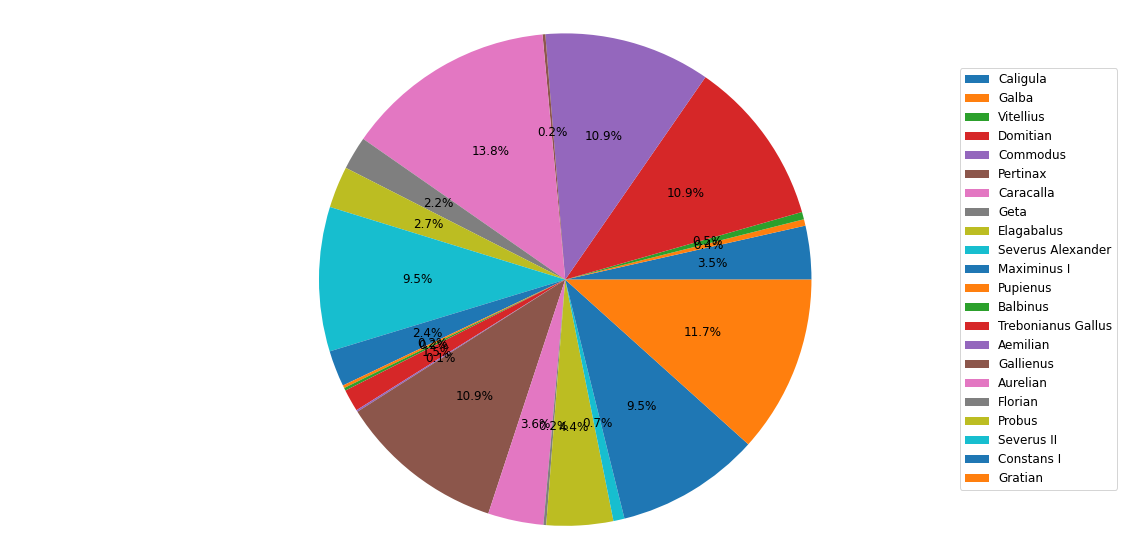

In [50]:
# Plotting the dataset
labels = assasinated_data.Emperor 
sizes = assasinated_data.Length_of_Reign

fig, ax = plt.subplots(figsize=(20,10))
plt.pie(sizes, autopct='%1.1f%%', startangle=0, textprops={'fontsize': 12})
plt.axis('equal')
plt.legend( labels, loc="center right", fontsize = 12)
plt.show()

## Question 10   
    Create a scatter plot showing the relationship between the total revenue earned by
    arcades and the number of Computer Science PhDs awarded in the U.S. between
    2000 and 2009.
    Don't forget to label your axes!
    Color each dot according to its year.

In [51]:
# Defining the dataset
revenue_df = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")

revenue_df

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


In [52]:
# Defining the X and Y values
x = revenue_df["Total Arcade Revenue (billions)"]
y = revenue_df["Computer Science Doctorates Awarded (US)"]
color = revenue_df["Year"]

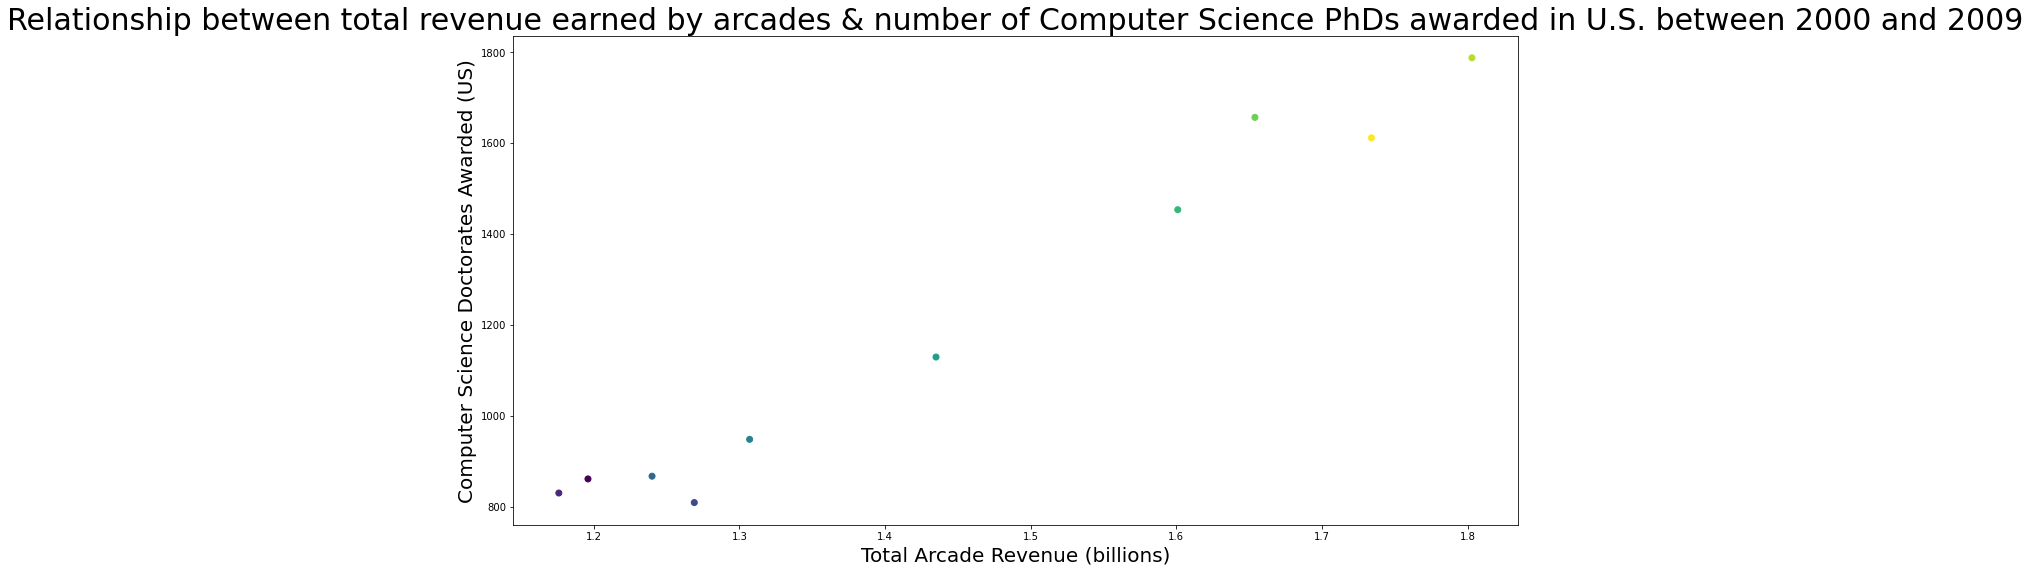

In [53]:
# Plotting the data
plt.figure(figsize = (18,9))
plt.scatter(x,y, c = color)
plt.xlabel('Total Arcade Revenue (billions)',fontsize=20)
plt.ylabel('Computer Science Doctorates Awarded (US)',fontsize=20)
plt.title("Relationship between total revenue earned by arcades & number of Computer Science PhDs awarded in U.S. between 2000 and 2009", fontsize = 30)
plt.show()